In [ ]:
!git clone https://github.com/hung20204912/cuu_em
%cd cuu_em

Cloning into 'cuu_em'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 31 (delta 1), reused 6 (delta 1), pack-reused 25
Unpacking objects: 100% (31/31), 44.56 MiB | 6.95 MiB/s, done.
Updating files: 100% (19/19), done.
/content/cuu_em


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data = pd.read_csv('After Preprocessed.csv')
data = data.drop('Unnamed: 0', axis = 1)
data.head(10)

,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
5,Probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated Seahunt...,positive
7,show amazing fresh innovative idea 70 first ai...,negative
8,Encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


In [ ]:
x = data['review']
y = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state = 0)

In [ ]:
tv=TfidfVectorizer(ngram_range = (1,3))
tv.fit(x_train)
x_train =tv.transform(x_train)
x_test =tv.transform(x_test)
print('Tfidf_train:',x_train.shape)
print('Tfidf_test:',x_test.shape)

Tfidf_train: (40000, 7154381)
Tfidf_test: (10000, 7154381)


In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = RF.predict(x_test)
lr_tfidf_score=accuracy_score(y_test, y_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.8463


In [ ]:
# classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      5035
    positive       0.85      0.84      0.85      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



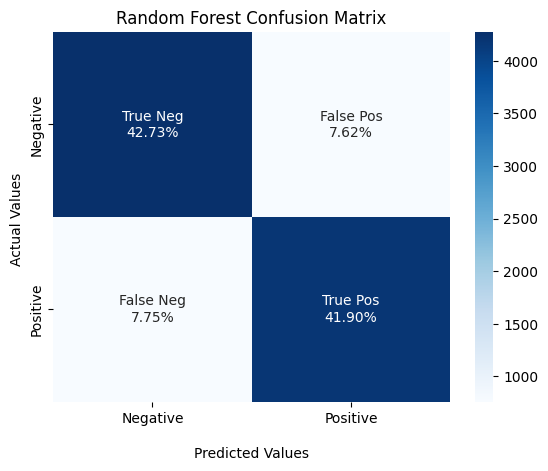

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot = labels,
            fmt='', cmap='Blues',xticklabels = categories, yticklabels = categories)

ax.set_title('Random Forest Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()